In [3]:
# NEURON - Python tutorials - Scripting NEURON basis

In [4]:
import neuron

--No graphics will be displayed.


In [5]:
from neuron import h

In [6]:
from neuron import h, rxd

In [7]:
from neuron.units import ms, mV

In [8]:
soma = h.Section(name="soma")

In [9]:
h.topology()


|-|       soma(0-1)



1.0

In [10]:
soma.psection()

{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x615aea3699e0',
 'cell': None}

In [11]:
soma.L = 20
soma.diam = 20

In [12]:
import textwrap

print(textwrap.fill(", ".join(dir(h))))

APCount, AlphaSynapse, Avogadro_constant, BBSaveState, CVode, DEG,
Deck, E, Exp2Syn, ExpSyn, FARADAY, FInitializeHandler, File, GAMMA,
GUIMath, Glyph, Graph, HBox, IClamp, Impedance, IntFire1, IntFire2,
IntFire4, KSChan, KSGate, KSState, KSTrans, L, LinearMechanism, List,
Matrix, MechanismStandard, MechanismType, NetCon, NetStim, OClamp,
PHI, PI, PPShape, PWManager, ParallelContext, PatternStim, PlotShape,
PointProcessMark, Pointer, PtrVector, PythonObject, R, Ra, Random,
RangeVarPlot, SEClamp, SaveState, Section, SectionBrowser,
SectionList, SectionRef, Shape, SingleChan, StateTransitionEvent,
StringFunctions, SymChooser, TQueue, TextEditor, Timer, VBox, VClamp,
ValueFieldEditor, Vector, __abs__, __add__, __bool__, __call__,
__class__, __delattr__, __delitem__, __dir__, __doc__, __eq__,
__format__, __ge__, __getattribute__, __getitem__, __gt__, __hash__,
__init__, __init_subclass__, __iter__, __le__, __len__, __lt__,
__module__, __mul__, __ne__, __neg__, __new__, __next__, __pos__,
__

In [13]:
soma.insert("hh")

soma

In [14]:
print("type(soma) = {}".format(type(soma)))
print("type(soma(0.5)) = {}".format(type(soma(0.5))))

type(soma) = <class 'nrn.Section'>
type(soma(0.5)) = <class 'nrn.Segment'>


In [15]:
iclamp = h.IClamp(soma(0.5))

In [16]:
print([item for item in dir(iclamp) if not item.startswith("__")])

['amp', 'baseattr', 'delay', 'dur', 'get_loc', 'get_segment', 'has_loc', 'hname', 'hocobjptr', 'i', 'loc', 'same']


In [17]:
iclamp.delay = 2
iclamp.dur = 0.1
iclamp.amp = 0.9

In [18]:
soma.psection()

{'point_processes': {'IClamp': {IClamp[0]}},
 'density_mechs': {'hh': {'gnabar': [0.12],
   'gkbar': [0.036],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.0],
   'gk': [0.0],
   'il': [0.0],
   'minf': [0.0],
   'hinf': [0.0],
   'ninf': [0.0],
   'mtau': [0.0],
   'htau': [0.0],
   'ntau': [0.0],
   'm': [0.0],
   'h': [0.0],
   'n': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 20.0,
  'diam': [20.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x615aea3699e0',
 'cell': None}

In [19]:
v = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
t = h.Vector().record(h._ref_t)  # Time stamp vector

In [20]:
h.load_file("stdrun.hoc")

1.0

In [21]:
h.finitialize(-65 * mV)

1.0

In [22]:
h.continuerun(40 * ms)

0.0

In [23]:
from bokeh.io import output_notebook
import bokeh.plotting as plt

output_notebook()

Loading BokehJS ...

In [24]:
import matplotlib.pyplot as plt

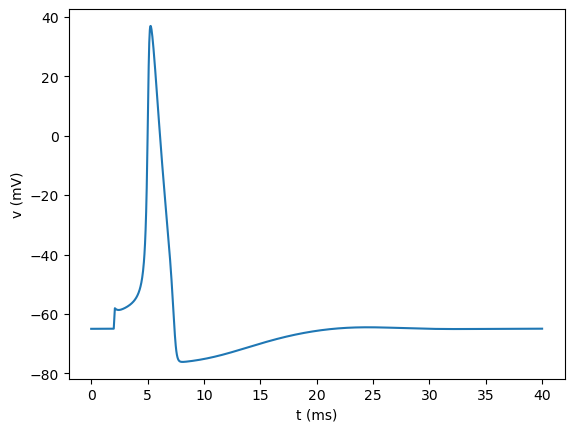

In [25]:
plt.figure()
plt.plot(t, v)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()

In [ ]:
# 9-1) CSV 파일 변환

In [26]:
import csv

In [28]:
with open("data.csv", "w") as f:
    csv.writer(f).writerows(zip(t, v))

In [29]:
with open("data.csv") as f:
    reader = csv.reader(f)
    tnew, vnew = zip(*[[float(val) for val in row] for row in reader if row])

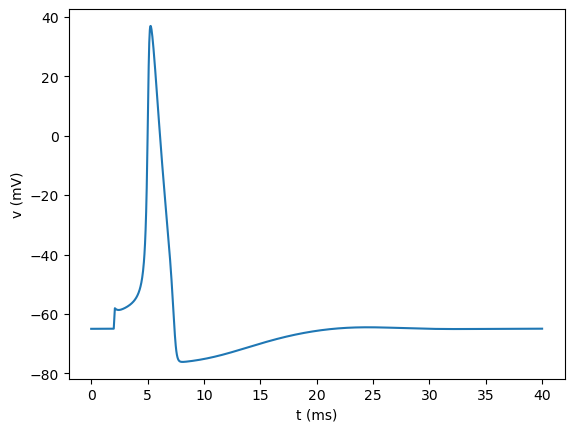

In [30]:
plt.figure()
plt.plot(tnew, vnew)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()

In [33]:
import plotnine as p9
import pandas as pd

In [34]:
data = pd.read_csv("data.csv", header=None, names=["t", "v"])

In [35]:
g = (p9.ggplot(data, p9.aes(x="t", y="v")) + p9.geom_path()).draw()

In [ ]:
# 9-2) JSON 형식으로 변환

In [36]:
import json

In [37]:
with open("data.json", "w") as f:
    json.dump({"t": list(t), "v": list(v)}, f, indent=4)

In [38]:
with open("data.json") as f:
    data = json.load(f)
tnew = data["t"]
vnew = data["v"]

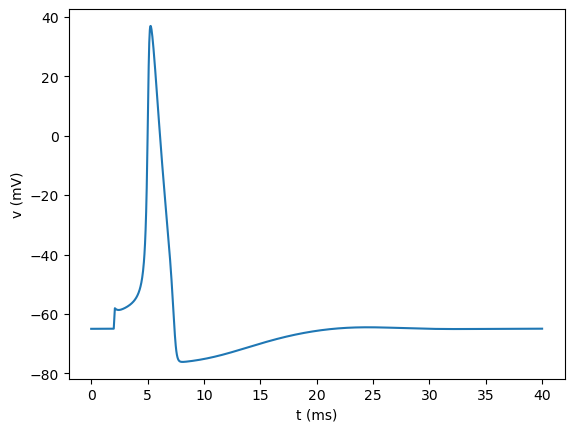

In [39]:
plt.figure()
plt.plot(tnew, vnew)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()

In [ ]:
# 9-3) pickle 형식으로 변환

In [40]:
import pickle

In [41]:
with open("data.p", "wb") as f:
    pickle.dump({"t": t, "v": v}, f)

In [42]:
with open("data.p", "rb") as f:
    data = pickle.load(f)
tnewp = data["t"]
vnewp = data["v"]

In [47]:
type(tnewp)

hoc.HocObject

In [48]:
tnewp.hname()

'Vector[2]'

In [49]:
type(tnew)

list

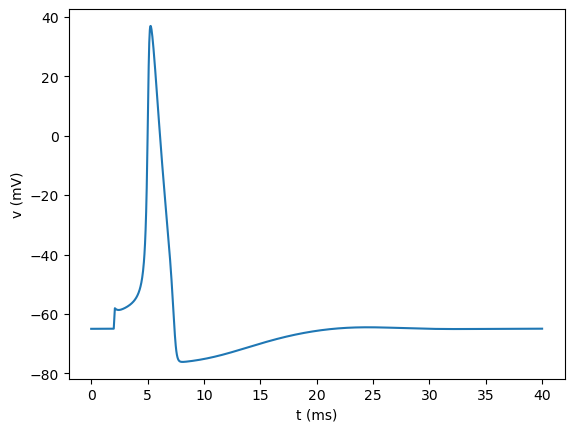

In [50]:
plt.figure()
plt.plot(tnewp, vnewp)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()